**Интернет-магазин**

**Цель исследования** - необходимо проверить гипотезы.

**Ход исследования**:
1. Приоритизация гипотез.
2. Анализ A/B-теста

# Приоритизация гипотез

## Обзор данных

In [2]:
#Импорт бибилотек
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters

In [3]:
#Загрузка датасетов
try:
    data = pd.read_csv('D:\IT\python\yandex\DA\poject\sprint13\hypothesis.csv')
except:
    data = pd.read_csv('/datasets/hypothesis.csv')

In [4]:
#Отобразить все символы в столбце
pd.set_option('display.max_colwidth', None)

In [5]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем название столбцов к нижнему регистру

In [6]:
data.columns = data.columns.str.lower()

В фалй находятся 9 гипотез с параметрами, которые необходимы для приоритезации.

## Приоритезация способом ICE

In [7]:
#добавление столбца и вычисление приоритета
data['ice'] = round((data.impact*data.confidence)/data.efforts, 2)

In [8]:
#вывод необходимых стобцом и сортировка
data[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Методом ICE 1 по приоритетету гипотеза "Запустить акцию, дающую скидку на товар в день рождения"

## Приоритезация способом RICE

In [9]:
#добавление столбца и вычисление приоритета
data['rice'] = (data.reach*data.impact*data.confidence)/data.efforts

In [10]:
#вывод необходимых стобцом и сортировка
data[['hypothesis', 'rice', 'reach']].sort_values(by='rice', ascending=False)

,hypothesis,rice,reach
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,8
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,5
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,1
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,8
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,3


Методом ICE 1 по приоритетету "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", а последнее место не изменилось "Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

**Вывод:** Разница этих двух методов приоритизации в параметре охвата пользователей, который ICE не учитывает при подсчете. Из-за выского параметра способе RICE на первых двух местах по важности стали другие гипотезы.

# Анализ A/B-теста

## Работа с исходными данными

### Обзор данных

In [11]:
#Загрузка датасетов
try:
    orders, visitors = (pd.read_csv('D:\IT\python\yandex\DA\poject\sprint13\orders.csv'),
                       pd.read_csv('D:\IT\python\yandex\DA\poject\sprint13\wvisitors.csv'))
except:
    orders, visitors = (pd.read_csv('/datasets/orders.csv'),
                       pd.read_csv('/datasets/visitors.csv'))

In [12]:
display(orders, visitors)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
[print(i.info(), '\n') for i in [orders, visitors]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None 



[None, None]

В данных в столбцах с датой неправильный тип.

### Предобработка данных

Преобразуем столбцы с датой в правильный тип

In [14]:
orders['date'] = pd.to_datetime(orders['date'])

visitors['date'] = pd.to_datetime(visitors['date'])

Проверим результат

In [15]:
[print(i.info(), '\n') for i in [orders, visitors]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None 



[None, None]

Все типы данных в столбцах соответствуют.

### Выполним поиск явных дубликатов

Для поиска явных дубликатов все данные в столбцах приведем к нижнему регистру. И выполним поиск дубликатов.

In [16]:
#приведение к нижнему регистру
orders['group'] = orders['group'].str.lower()

visitors['group'] = visitors['group'].str.lower()

In [17]:
#Поиск дубликатов
[print(i.duplicated().sum()) for i in [orders, visitors]]

0
0


[None, None]

Явных дубликатов необнаруженно.

Проведена предобработка данных. На первый взгляд структура данных правильная.

## Анализ данных A/B-теста

###  Анализируем тест по графикам

#### График кумулятивной выручки по группам

Для построения графика необходимо для начала получить агрегированные кумулятивные данные.

In [18]:
# Создадим массив уникальных пар значений дат и групп 
datesGroups = orders[['date', 'group']].drop_duplicates()

# агрегируем 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

Объеденяем агрегированные данные.

In [19]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

# присваиваем столбцам понятные названия
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Построим графики кумулятивной выручки

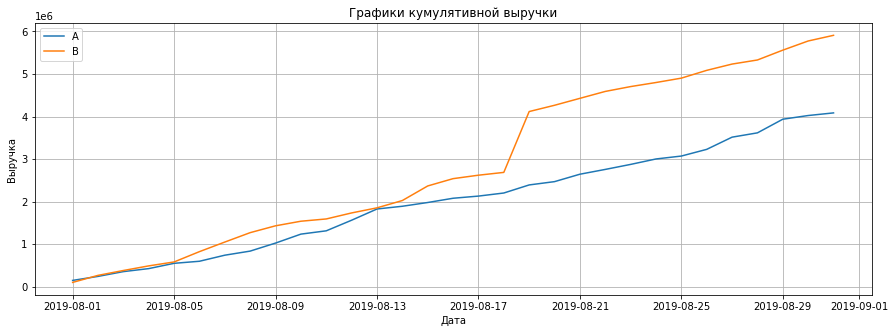

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='a'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='b'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Графики кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.legend();

Графики выручки почти равномерно увеличиваются в процессе тест, это хорошо. Но есть всплеск у группы В. Это может быть связано или с аномальным числом заказов, или аномальными большими заказами.

#### График кумулятивного среднего чека

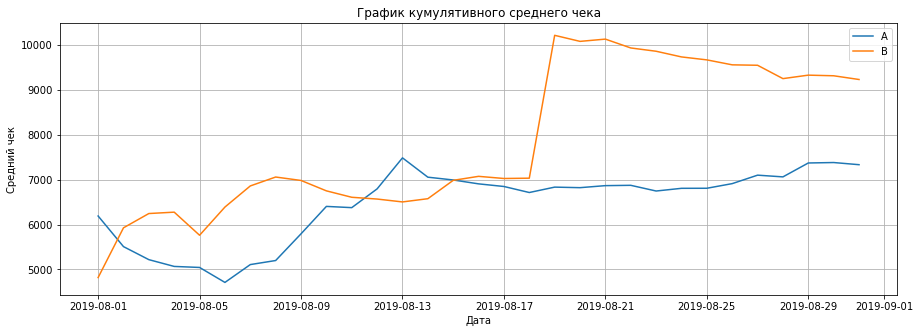

In [21]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.legend();

Группа А почти стабилизировалась. Группа В надо еще время, так как видимо были какие-то большие заказы, которые повлияли на нее.

#### График относительного изменения кумулятивного среднего чека группы B к группе A.

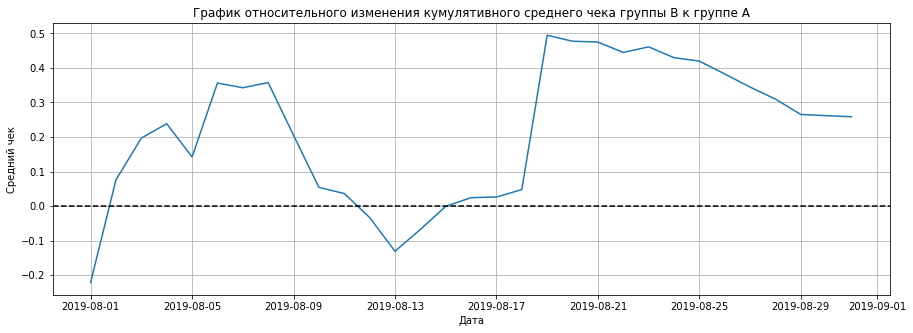

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left',
                                                   suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

График показывает, что средний чек группы В больше, и меняется он скачками. Это значит в эти даты были сделаны крпуные заказы или присутствуют аномалии.

#### График кумулятивного среднего количества заказов на посетителя по группам

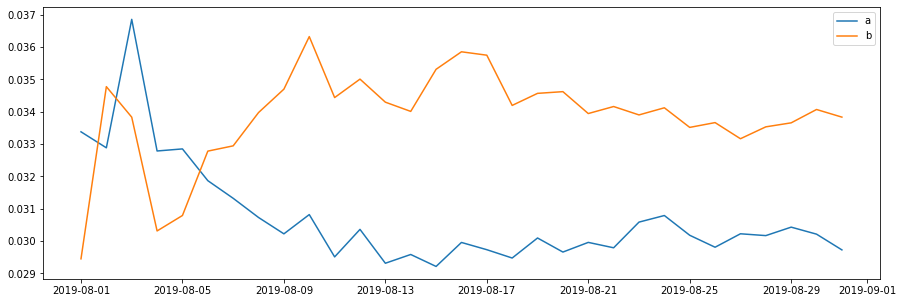

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='a']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='b']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='a')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='b')
plt.legend();

Конверсии групп В сама начале были похожи, но у группы Ф она была больше, дальше коверсия группы Ф начала падать, а В наообрт расти. И можно сказать, что они стабилизировалась, где группа В оказалась в лидерах.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

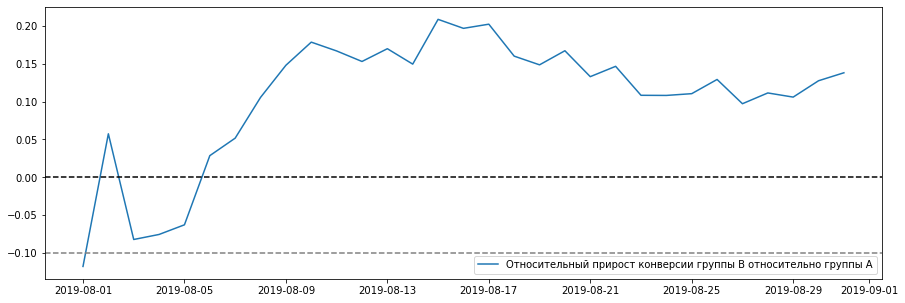

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

Относительная изменение конверсии, подтверждает прошлый вывод, группа В лучше себя показывает.

#### Точечный график количества заказов по пользователям

Создадим таблицу с суммой заказов каждого пользователя.

In [25]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [26]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

#переименовываеем столбцы
ordersByUsers.columns = ['userId', 'orders']

Строим точечный график

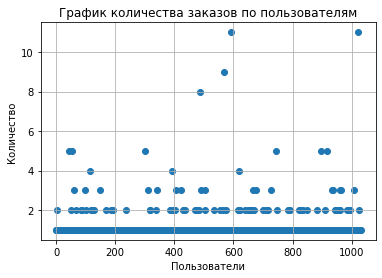

In [27]:
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.title('График количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество')
plt.grid()
plt.scatter(x_values, ordersByUsers['orders']);

На графики видный явные выбросы в заказах. Много пользователей с 1-2 заказами. И лишь единицы заказывали больше 5.

### Работа с аномалиями

#### Расчет 95-й и 99-й перцентили количества заказов на пользователя

In [28]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Данных недостаточно, чтобы сделать однозначний вывод, необходимо выделить и промежуточные границы.

In [29]:
np.percentile(ordersByUsers['orders'], [95, 96, 97, 98, 99])

array([2., 2., 2., 3., 4.])

97 процентов люде совершают по 2 заказа, все что больше, можно считать выбросом.

#### Точечный график стоимостей заказов

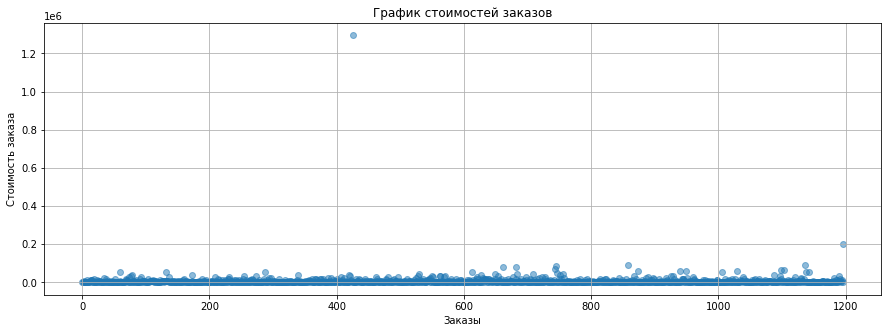

In [30]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.5);

Только о единицах заказов можно сказать, что они являются выбросами.

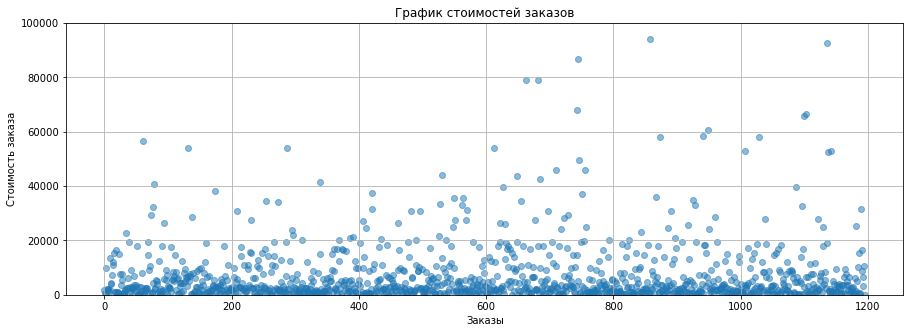

In [31]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 100000);

Грфически видно, что граница сильных выбросов проходит где-то наа 60000 стомости заказа.

#### Расчет 95-й и 99-й перцентили стоимости заказов

In [32]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Судя по всему выбросами являются гораздно больше заказов, чем видно на графике, все дело в масштабе из-за сильных выбросов. Аномальными заказми можно считать все, что больше 99 перцентиля.

### Cтатистическая значимость

#### Подготовка данных для стат анализа

Создадим кумулятивные таблицы для каждой и группы. Сначала для таблицы visitors.

In [33]:
#Выборка данных
visitorsADaily = visitors[visitors['group'] == 'a'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#Количество пользователей до выбранной даты включительно в группе А
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

#переименование столбцов
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#Количество пользователей до выбранной даты включительно в группе В
visitorsBDaily = visitors[visitors['group'] == 'b'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

#переименование столбцов
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Тоже самое делаем для orders.

In [34]:
#Выборка данных и группировка по дню.
ordersADaily = (
    orders[orders['group'] == 'a'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#суммарное количество заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

#Выборка данных
ordersBDaily = (
    orders[orders['group'] == 'b'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#суммарное количество заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

Объеденяем получившиеся таблицы

In [35]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы.

Нулевая: различий в среднем количестве заказов между группами нет.

Альтернативная: различия в среднем между группами есть.

Создадим переменные ordersByUsersA и ordersByUsersB, в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'a']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'b']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов.

In [37]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Проводим стат тест.

In [38]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.008


Значимость меньше 0.05, поэтому 0 гипотезу отвергаем. Анализ "сырых данных" сообщает, что в среднем количество заказов между группами есть статистически значимые различия.

Разница в средних

In [39]:
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.138


В группе "В" значительно больше заказов, это могут быть выбросы или их больше, который и привели к таким результатам.

#### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая: различий в среднем чеке заказа между группами нет.

Альтернативная: различия в среднем между группами есть.

In [40]:
print('Стат тест {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='a']['revenue'], orders[orders['group']=='b']['revenue'])[1]))
print('Разница средних {0:.3f}'.format(orders[orders['group']=='b']['revenue'].mean()/orders[orders['group']=='a']['revenue'].mean()-1))

Стат тест 0.365
Разница средних 0.259


Нулевую гипотезу нельзя отвергнуть. Анализ "сырых данных" сообщает, что в среднем чеке заказа между группами нет статистически значимого различия. Сердний чек заказа группы В значительно больше. Опять же такое различие можеть быть из-за аномально больших заказов.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Отфильтруем данные. Исключим аномальные значения.

In [41]:
# фильтруем для каждой группы по количеству заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [97]))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [97]))]['userId'],
    ],
    axis=0,
)

# фильтруем по каждому заказазу по стоимости
usersWithExpensiveOrders = orders[orders['revenue'] > float(np.percentile(orders['revenue'], [99]))]['visitorId']

# Объеденяем данные
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Подготовим выборки количества заказов по пользователям по группам теста.

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [43]:
print('стат {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('разница {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

стат 0.005
разница 0.174


In [44]:
print(f'относительная разница в средних между сырми и очищенными данными {1 - 0.138/0.174:.2f}')

относительная разница в средних между сырми и очищенными данными 0.21


Результат не изменился. Разница в статистическом критерии p-value не существенная. Разница средних составила 21 процент. Это нам говорит, о том, что выбросов оказалось в группе А больше, чем в группе В.

#### Статистически значимый различий в среднем чеке заказа между группами по «очищенным» данным

In [45]:
print(
    'стат {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'a',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'b',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "разница {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'b',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'a',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

стат 0.399
разница -0.020


In [46]:
print(f'относительная разница в средних между сырми и очищенными данными {1 - 0.259/-0.020:.2f}')

относительная разница в средних между сырми и очищенными данными 13.95


Результат проверки гипотезы неизменился. Но разница между группами скоратилась сильно. Относительно стат тест особого существенного изменения нет между показателями p-value. Относительная разница средних между очищенным и сырми данным составила 14 процентов. Это нам говорит, что что выбросов по среднем чеку в группе В оказалось значительно больше, и после очистки они практически уравнялись.

### Решение по результатам теста

Результаты:
* Есть статистически значимое различие в среднем количестве заказов на посетителя и в среднем чеке заказа между группами как по сырым данным, так и после фильтрации аномалий.
* График показали, что результаты группы В лучше.

Решение: остановить тест, зафиксировать победу группы В.

# Вывод

В ходе исследования были приоритизированы гипотезы, запущен A/B-тест и проанализирован результат.

При приотизации гипотез были опробавны два метода, между которыми были найдены различия, которые повлияли на приоритезацию. Методы ICE и RICE похожи, но RICE учитывает еще один параметр, что привело к различиям.

Результат А/В теста считаем успешным. Тест остановлен и зафиксирована победа группы В. Это доказано, как графически, так и после проверки гипотез, где были найдены статистические значимые отличия.